IE5374 17529 ST: Foundations Data Analytics (Group 33)

Project 2 (Task 1)

Google drive is used for the project. The subjects are in drive folder and retrived in the project when required. The head and chest data of the subjects are taken for the analysis as told. Both the task are done this python notebook. 

In [ ]:
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing all the library required for the project 
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
from tabulate import tabulate
from itertools import repeat

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#making the folder's path
folder_path = r'/content/drive/MyDrive/Project_2_subjects'
os.chdir(folder_path)
subject_folders=os.listdir()
print(subject_folders)

['Subject8', 'Subject3', 'Subject4', 'Subject7', 'Subject14', 'Subject2', 'Subject9', 'Subject15', 'Subject6', 'Subject5', 'Subject1', 'Subject10', 'Subject11', 'Subject12', 'Subject13']


In [ ]:
#Required Output
column = ['Method','Subject','Accelerometer axis','Average degree','Network diameter','Average path length','Activity']
df_output_1 = pd.DataFrame(columns=column)

In [ ]:
#lists to add the values
degree = []
diameter = []
length = []
axis = []
methods=[]

In [ ]:
#HVG and calculating the network diameter, average path length, and average degree
def HVG():
  for i in ax:
    g = HorizontalVG()
    g.build(df_temp[i])
    ig_g = g.as_igraph()
    avg_degree = np.mean(ig_g.degree())
    network_dm = ig_g.diameter()
    avg_path_length = ig_g.average_path_length()

    degree.append(avg_degree)
    diameter.append(network_dm)
    length.append(avg_path_length)
    axis.append(i)
    methods.append('HVG')

In [ ]:
#NVG and calculating the network diameter, average path length, and average degree
def NVG():
  for i in ax:
    g = NaturalVG()
    g.build(df_temp[i])
    ig_g = g.as_igraph()
    avg_degree = np.mean(ig_g.degree())
    network_dm = ig_g.diameter()
    avg_path_length = ig_g.average_path_length()
    degree.append(avg_degree)
    diameter.append(network_dm)
    length.append(avg_path_length)
    axis.append(i)
    methods.append("NVG")

In [ ]:
#using regular expression to find the subject and activity
Subject=[]
Activity=[]
for subject in subject_folders:
    files=[]
    for file in os.listdir(subject):
        files.append(file)
    for file in files:
        df = pd.read_csv(folder_path+'//'+subject+'//'+str(file))
        ax = df.columns[2:]
        file_length = len(file.split("_"))
        if file_length > 4:           
            for i in repeat(None, 6):
                Subject.append(subject[7:])
                Activity.append(re.split(r"_",file)[1]) 
        else:               
           for i in repeat(None, 6):
                Subject.append(subject[7:])
                Activity.append(re.split(r"_",file)[1])
        df_temp = df[1000:2024]
        # Building HVG and NVG 
        NVG()
        HVG()

In [ ]:
#transforming list data into dataframe columns
df_output_1['Method'] = methods
df_output_1['Subject']=Subject
df_output_1['Accelerometer axis'] = axis
df_output_1['Average degree']= degree
df_output_1['Network diameter'] = diameter
df_output_1['Average path length'] = length
df_output_1['Activity'] = Activity

In [ ]:
#Result
df_output_1

,Method,Subject,Accelerometer axis,Average degree,Network diameter,Average path length,Activity
0,NVG,8,attr_x,11.935547,10,4.813775,walking
1,NVG,8,attr_y,12.666016,9,4.659576,walking
2,NVG,8,attr_z,11.105469,10,4.657600,walking
3,HVG,8,attr_x,3.972656,29,13.331714,walking
4,HVG,8,attr_y,3.972656,30,13.057324,walking
...,...,...,...,...,...,...,...
859,NVG,13,attr_y,15.726562,9,4.602677,climbingup
860,NVG,13,attr_z,17.712891,9,4.475543,climbingup
861,HVG,13,attr_x,3.925781,39,17.427503,climbingup
862,HVG,13,attr_y,3.947266,46,18.629187,climbingup


Scatter plot

In [ ]:
#Plots for walking and running
plot = df_output_1[(df_output_1['Activity']=='running') | (df_output_1['Activity']=='walking')]

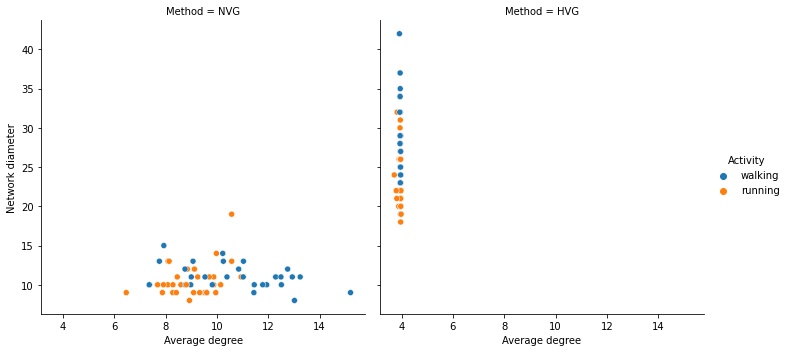

In [ ]:
#Accelerometer axis x
plot_x=plot[plot['Accelerometer axis']=='attr_x']
sns.relplot(data=plot_x,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

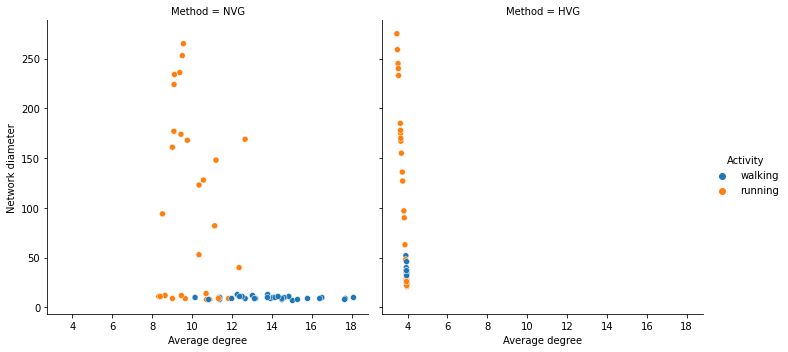

In [ ]:
#Accelerometer axis y
plot_y=plot[plot['Accelerometer axis']=='attr_y']
sns.relplot(data=plot_y,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

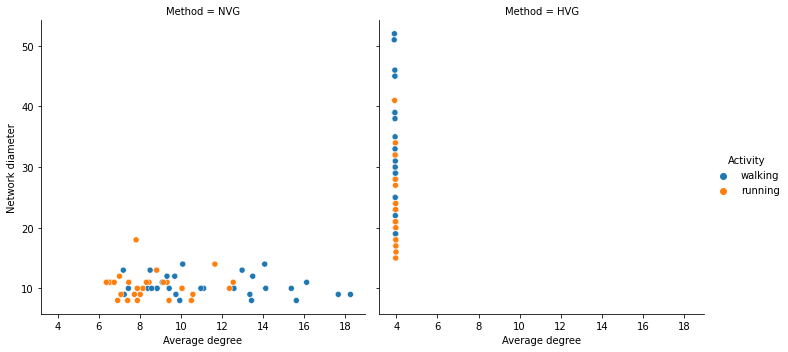

In [ ]:
#Accelerometer axis z
plot_z=plot[plot['Accelerometer axis']=='attr_z']
sns.relplot(data=plot_z,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

In [ ]:
#Plots for climbing_up and climbing_down
plot = df_output_1[(df_output_1['Activity']=='climbingup') | (df_output_1['Activity']=='climbingdown')]

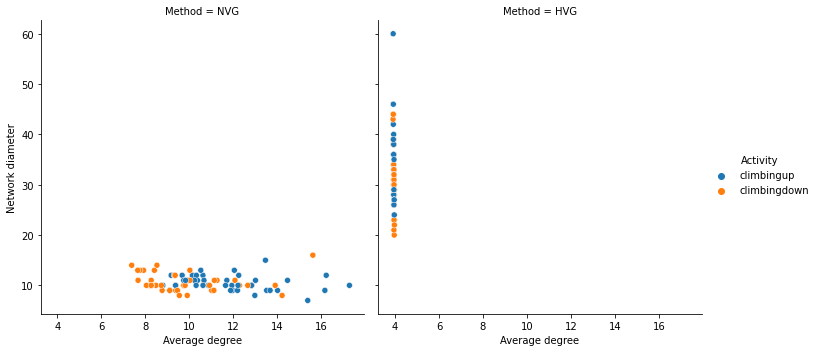

In [ ]:
#Accelerometer axis x
plot_x=plot[plot['Accelerometer axis']=='attr_x']
sns.relplot(data=plot_x,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

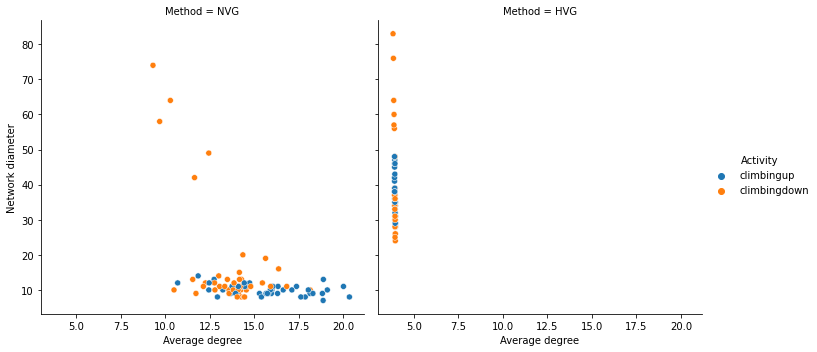

In [ ]:
#Accelerometer axis y
plot_y=plot[plot['Accelerometer axis']=='attr_y']
sns.relplot(data=plot_y,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

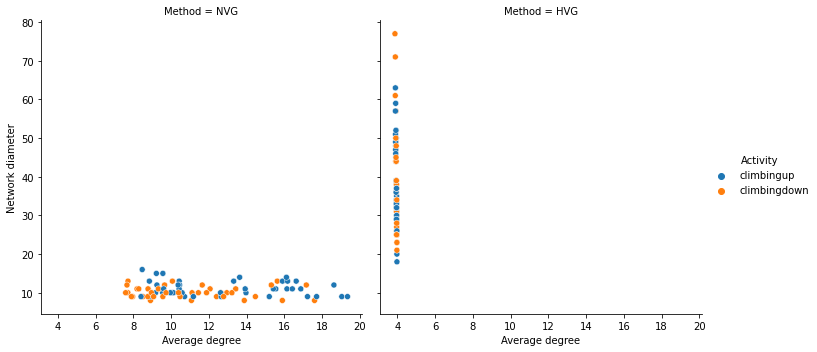

In [ ]:
#Accelerometer axis z
plot_z=plot[plot['Accelerometer axis']=='attr_z']
sns.relplot(data=plot_z,x='Average degree',y='Network diameter',hue='Activity',col='Method')
plt.show()

Task 2

In [ ]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

In [ ]:
#Required Output
column = ['Subject','Accelerometer Axis','Signal Length','Dimension','Delay','Permutation Entropy','Complexity','Activity']
df_output_2 = pd.DataFrame(columns=column)

In [ ]:
#lists to add the values
Subject2=[]
Activity2=[]
Axis=[]
Signal_length=[]
Dim=[]
Delay=[]
Permutation_entropy=[]
Complexity=[]

In [ ]:
#using regular expression to find the subject and activity
#using the above function to calculate Permutation_entropy,Complexity
#Calculating embedded dimension,delay,axis,signal_length
for subject in subject_folders:
    files=[]
    files.extend(os.listdir(subject))
    for file in files:
        df = pd.read_csv(folder_path+'//'+subject+'//'+file)
        for ax in ['attr_x','attr_y','attr_z']:
            for i in np.array([3,4,5,6]):
                for j in np.array([1,2,3]): 
                    for k in np.array([1024, 2048, 4096]): 
                          Subject2.append(subject[7:])
                          Activity2.append((re.split(r"_",file)[1]))
                          Axis.append(ax)
                          Signal_length.append(k)
                          Dim.append(i)
                          Delay.append(j)
                          Permutation_entropy.append(p_entropy(ordinal_patterns(df[ax][1000:1000+k], i, j)))
                          Complexity.append(complexity(ordinal_patterns(df[ax][1000:1000+k], i, j)))

In [ ]:
#transforming list data into dataframe columns
df_output_2['Subject']=Subject2
df_output_2['Accelerometer Axis']=Axis
df_output_2['Signal Length']=Signal_length
df_output_2['Dimension']=Dim
df_output_2['Delay']=Delay
df_output_2['Permutation Entropy']=Permutation_entropy
df_output_2['Complexity']=Complexity
df_output_2['Activity']=Activity2

In [ ]:
#result
df_output_2

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,8,attr_x,1024,3,1,0.724383,0.199654,walking
1,8,attr_x,2048,3,1,0.725765,0.198910,walking
2,8,attr_x,4096,3,1,0.717119,0.203189,walking
3,8,attr_x,1024,3,2,0.855354,0.120699,walking
4,8,attr_x,2048,3,2,0.844993,0.128140,walking
...,...,...,...,...,...,...,...,...
15547,13,attr_z,2048,6,2,0.759621,0.282400,climbingup
15548,13,attr_z,4096,6,2,0.743671,0.305854,climbingup
15549,13,attr_z,1024,6,3,0.883591,0.180112,climbingup
15550,13,attr_z,2048,6,3,0.854567,0.226018,climbingup


Scatter Plot

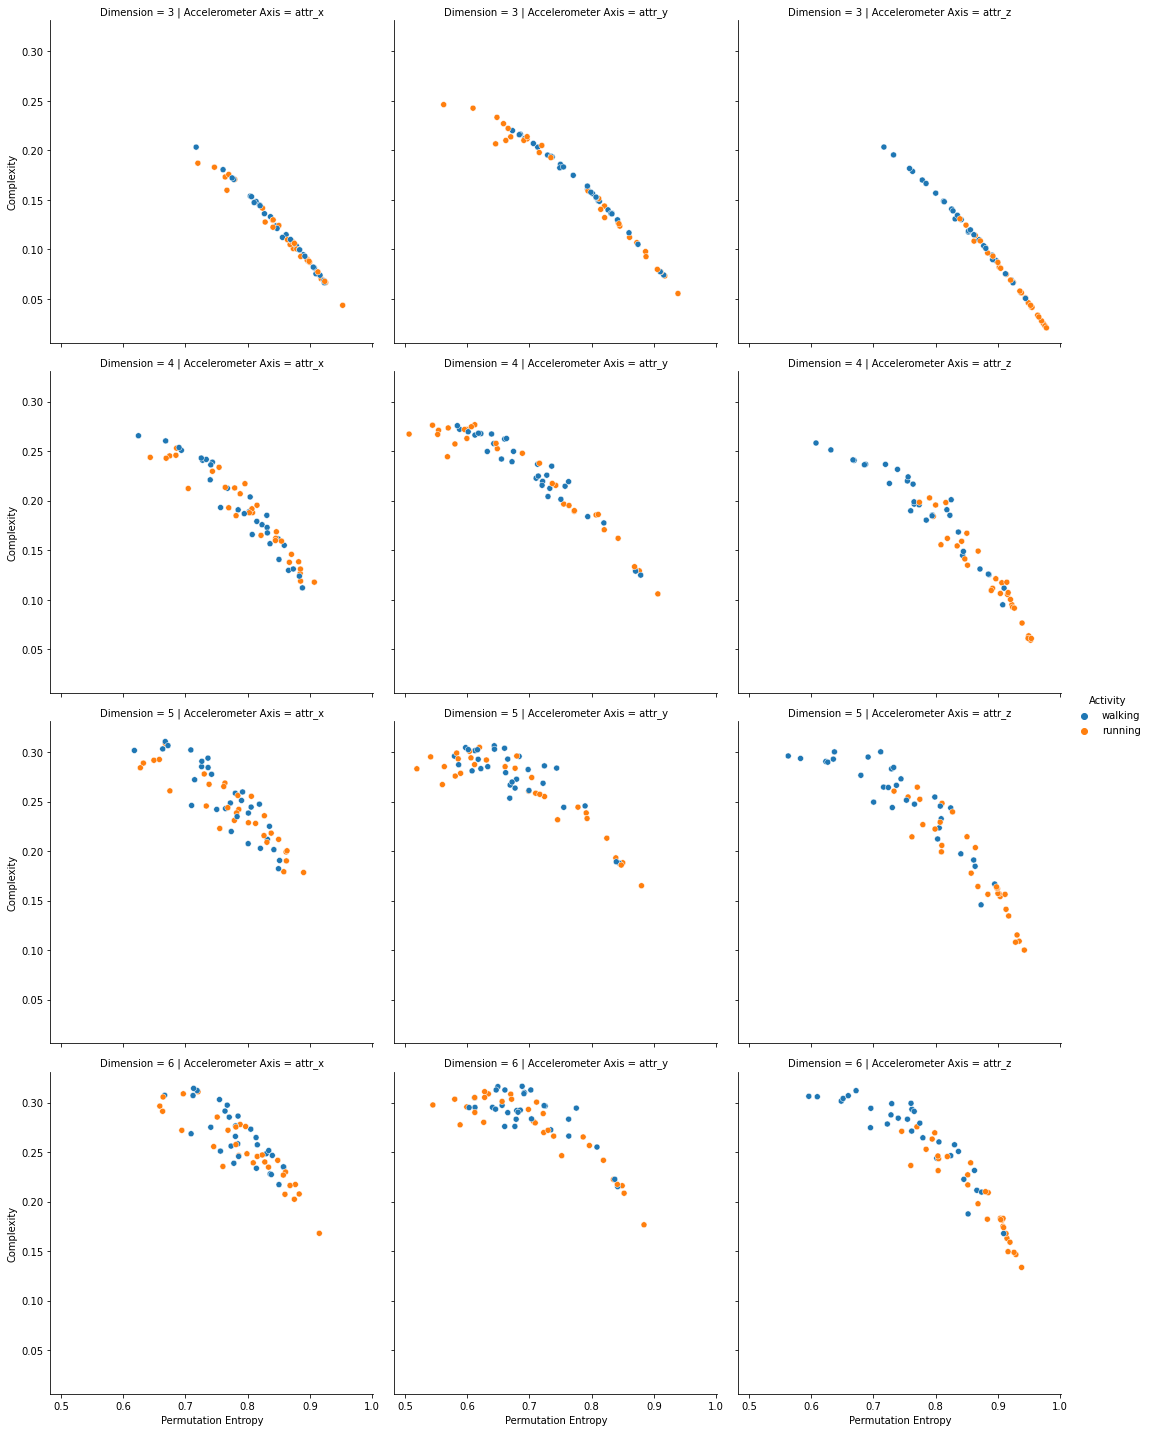

In [ ]:
#Walking and running scatter plots with a signal length of 4096 and a delay of 1
#Attributes X,X,Z
#Dimension 3,4,5,6
plot = df_output_2[(df_output_2['Activity']=='running') | (df_output_2['Activity']=='walking')]
plot_signal_delay = plot[(plot['Signal Length']==4096) & (plot['Delay']==1)]
sns.relplot(data=plot_signal_delay,x='Permutation Entropy',y='Complexity',hue='Activity',col='Accelerometer Axis',row='Dimension')
plt.show()

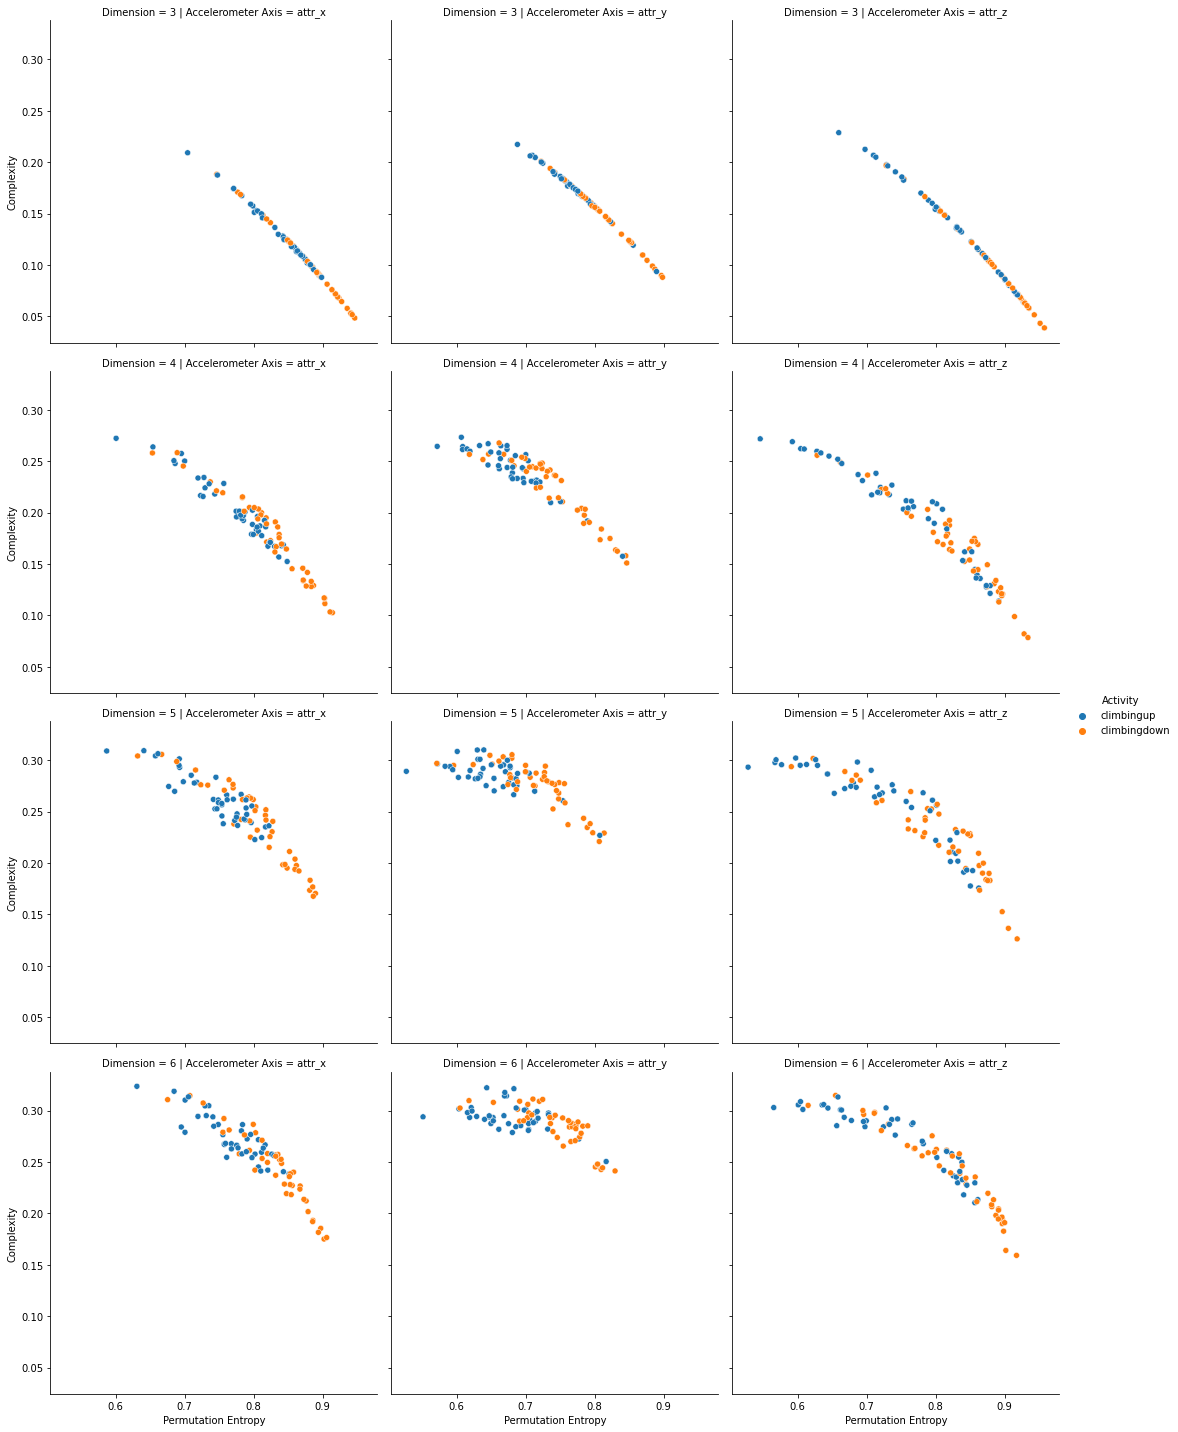

In [ ]:
# Climbing up and down scatter plots with a signal length of 4096 and delay=1:
#Attributes X,X,Z
#Dimension 3,4,5,6
plot = df_output_2[(df_output_2['Activity']=='climbingdown') | (df_output_2['Activity']=='climbingup')]
plot_signal_delay = plot[(plot['Signal Length']==4096) & (plot['Delay']==1)]
sns.relplot(data=plot_signal_delay,x='Permutation Entropy',y='Complexity',hue='Activity',col='Accelerometer Axis',row='Dimension')
plt.show()